## Project Idea: Predictive Modeling of Survey Respondent Behavior including 5 brand cars

#### What we will be covering:
 * Predicting likelihood to purchase a product/service.
 * Predicting customer satisfaction levels (e.g., Promoter/Detractor in NPS).
 * Predicting response patterns to certain types of questions.

#### Plan:
 * Problem: Which survey respondents are likely to express high purchase intent based on their answers to questions and demographic data.

The modeling process demonstrates how such data could be transformed, analyzed, and modeled using standard machine learning Random Forest.

### NOTE: The dataset used in this project is simulated survey data, generated using Decipher. While this structure is with realistic survey design, it does not reflect real-respondents responses. The model's predictive performance is constrained by the simulated data. I lost my mind until this finally hit me... 😄

In [315]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [316]:
df = pd.read_csv(r'C:\Users\mario\OneDrive\Desktop\Math Concepts of Developers\Final Project\Brand_cars.csv')

df.head()

,record,uuid,Q1r1,Q1r2,Q1r3,Q1r4,Q1r5,Q2r1,Q2r2,Q2r3,...,Q5r4,Q5r5,Q6,Q7,vQ7,Q8,Q9,Q10,Q11,Q12
0,5,jv3a82kutkd3vr26,5,1,3,2,2,0,0,0,...,3,5,3,6,6,4,1,3,2,2
1,10,st28yu1rp8reeg7s,4,3,1,2,4,1,0,0,...,1,2,5,8,8,3,4,5,2,3
2,21,emw6yfxexdycy09x,2,3,4,5,1,1,0,0,...,5,5,2,10,10,2,1,1,5,5
3,37,x2v1zy9ff4x652wj,5,1,2,3,5,1,0,0,...,5,3,5,4,4,1,2,2,4,4
4,39,497b8xcex37t5d6s,1,5,2,5,2,1,1,0,...,5,2,2,10,10,2,1,2,4,4


In [317]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   record  300 non-null    int64 
 1   uuid    300 non-null    object
 2   Q1r1    300 non-null    int64 
 3   Q1r2    300 non-null    int64 
 4   Q1r3    300 non-null    int64 
 5   Q1r4    300 non-null    int64 
 6   Q1r5    300 non-null    int64 
 7   Q2r1    300 non-null    int64 
 8   Q2r2    300 non-null    int64 
 9   Q2r3    300 non-null    int64 
 10  Q2r4    300 non-null    int64 
 11  Q2r5    300 non-null    int64 
 12  Q3      300 non-null    int64 
 13  Q4      300 non-null    int64 
 14  Q5r1    300 non-null    int64 
 15  Q5r2    300 non-null    int64 
 16  Q5r3    300 non-null    int64 
 17  Q5r4    300 non-null    int64 
 18  Q5r5    300 non-null    int64 
 19  Q6      300 non-null    int64 
 20  Q7      300 non-null    int64 
 21  vQ7     300 non-null    int64 
 22  Q8      300 non-null    in

### Renaming question labels to improve clarity and better reflect their purpose.

### Our objective is to predict purchase intent based on:
- Brand
- Interest in the brand
- Value and luxury
- Price, Safety, Fuel consumption and tech
- Income age and region


### We will rename the following Question labels to the given features which we will use for our features for X
- Q1 (Brand Perception Negative to Positive)
- Q2 (Which brand they would likely purchase in the next 12 months with values 1 and 0 for each brand) 
- Q3 (Which brand they associate with good value for money with values 1 and 0 for each brand)
- Q4 (Which brand they associate with luxury with values 1 and 0 for each brand)
- Q5 (Purchase Criteria regarding Price, Safety, Fuel consumption and tech)
- Q6 (If you were to buy a car today which one you would buy)
- Q8 (Budget on how much they are willing to spend)
- Q9-Q12 (Demographics questions like age, region, income andemployment)

### We will predict by Q7 which we renamed by purchase_intent_score, it's with numeric value from 1 = not likely to 10 = very likely by brand as input 'y'. 

In [318]:
df.columns = [    
    'record', 'uuid',
    'toyota_perception', 'bmw_perception', 'vw_perception', 'hyundai_perception', 'dacia_perception',
    'toyota_interest', 'bmw_interest', 'vw_interest', 'hyundai_interest', 'dacia_interest',
    'value_brand', 'luxury_brand',
    'importance_price', 'importance_fuel', 'importance_brand', 'importance_tech', 'importance_safety',
    'brand_choice', 
    'purchase_intent_score', 
    'vQ7', 
    'region',
    'age', 
    'income', 
    'employment', 
    'survey_quality'
]

df = df.drop(columns=['record', 'uuid', 'vQ7'])

for col in df.columns:
    print(col)

toyota_perception
bmw_perception
vw_perception
hyundai_perception
dacia_perception
toyota_interest
bmw_interest
vw_interest
hyundai_interest
dacia_interest
value_brand
luxury_brand
importance_price
importance_fuel
importance_brand
importance_tech
importance_safety
brand_choice
purchase_intent_score
region
age
income
employment
survey_quality


### Mapping survey codes to names so plots are more readable (This will create new columns to our dataframe, but we can remove them later.)

In [319]:
brand_map = {
    1: 'Toyota', 
    2: 'BMW', 
    3: 'Volkswagen', 
    4: 'Hyundai', 
    5: 'Dacia'
}

income_map = {
    1: 'Under 1000 BGN',
    2: '1000–2000 BGN',
    3: '2000–3000 BGN', 
    4: '3000–4000 BGN', 
    5: '4000+ BGN'
}

age_map = {
    1: '<25', 
    2: '25–34', 
    3: '35–44', 
    4: '45–54', 
    5: '55+'
}

region_map = {
    1: 'South', 
    2: 'North', 
    3: 'West', 
    4: 'East'
}

df['brand_choice_name'] = df['brand_choice'].map(brand_map)
df['income_label'] = df['income'].map(income_map)
df['age_label'] = df['age'].map(age_map)
df['region_label'] = df['region'].map(region_map)


### We want to know:
- Which **brands** people are likely to buy.
- How **income, age, and region** affect intent to purchase.
- How **demographics** align with brand preferences.

### Plotting purchase intent by brand 

- **Medeian distribution** of purchase intend for each brand, this will help us spot patterns.

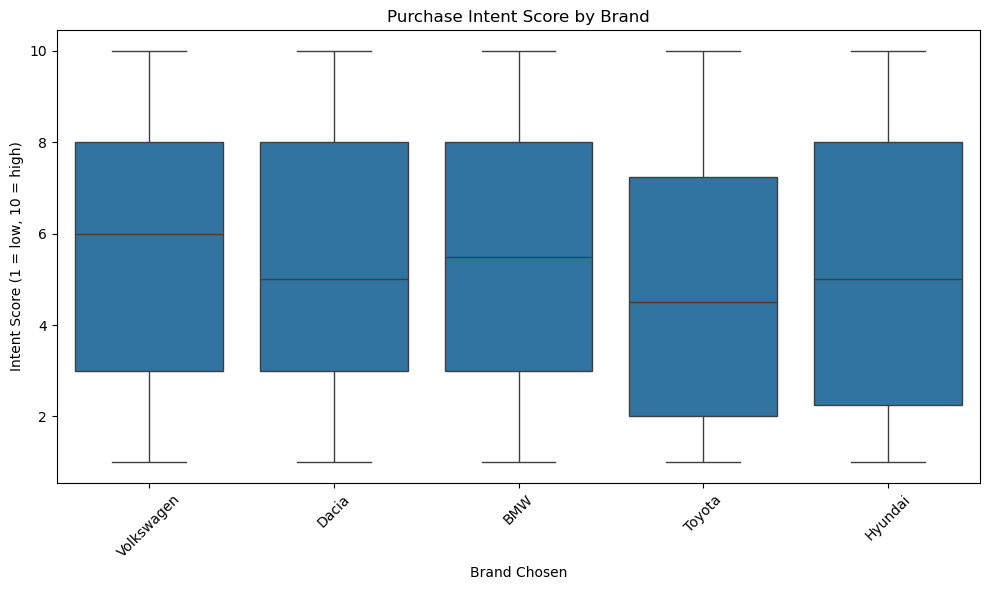

In [320]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='brand_choice_name', y='purchase_intent_score')
plt.title('Purchase Intent Score by Brand')
plt.xlabel('Brand Chosen')
plt.ylabel('Intent Score (1 = low, 10 = high)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Intent with brand and income
- We can detect which **income groups have purchase** intent for the given brand.

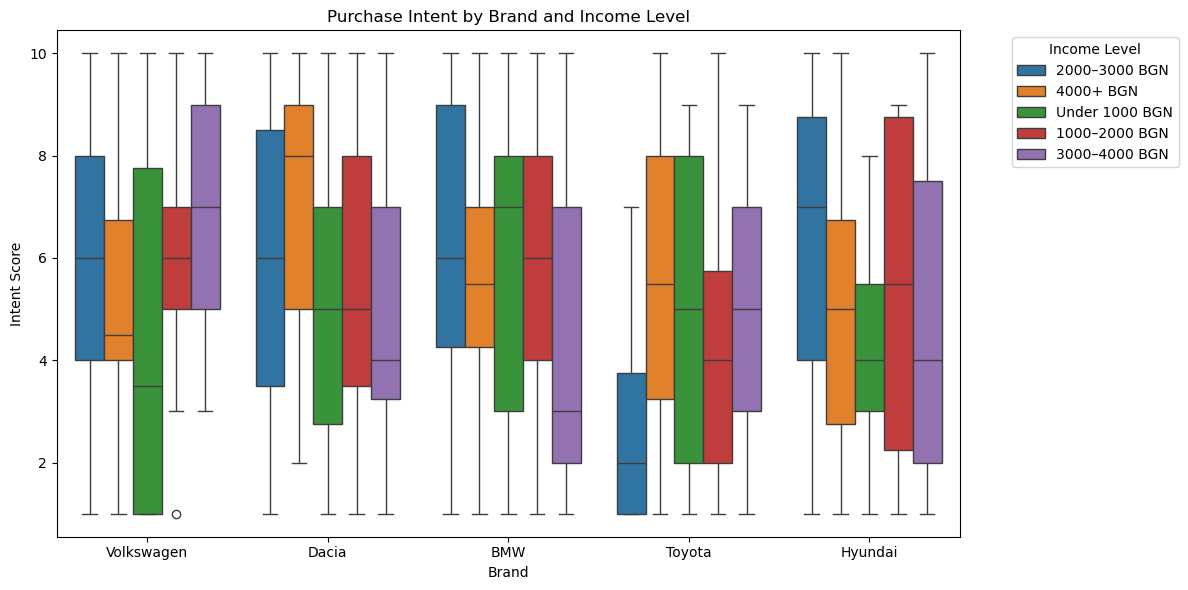

In [321]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='brand_choice_name', y='purchase_intent_score', hue='income_label')
plt.title('Purchase Intent by Brand and Income Level')
plt.xlabel('Brand')
plt.ylabel('Intent Score')
plt.legend(title='Income Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### What brands are prefered by region
- We can see which brand are prefered in given regions in bulgaria

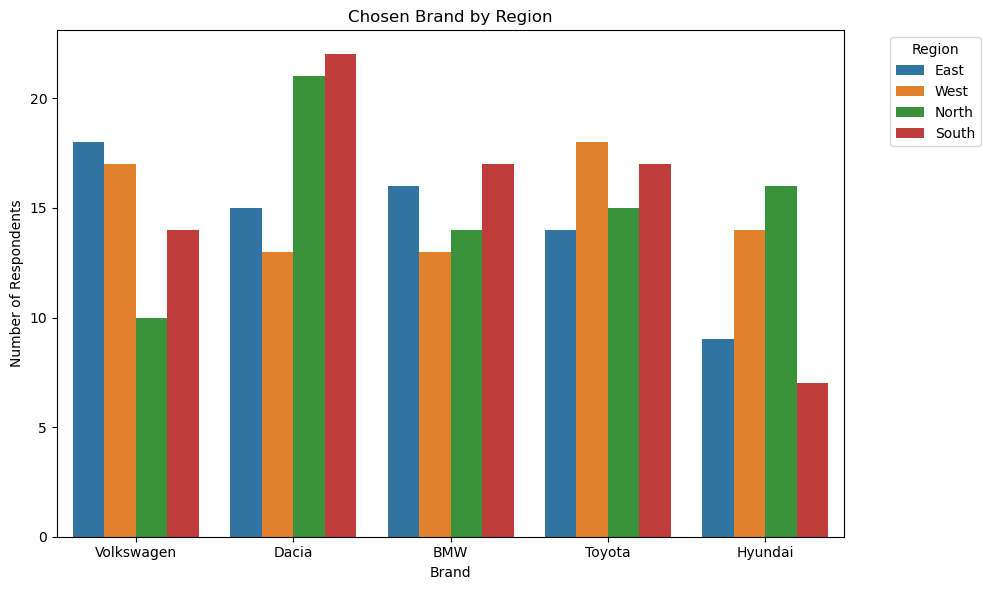

In [322]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='brand_choice_name', hue='region_label')
plt.title('Chosen Brand by Region')
plt.xlabel('Brand')
plt.ylabel('Number of Respondents')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Purchase intent by brand and age
- We can see what the age groups prefer to buy

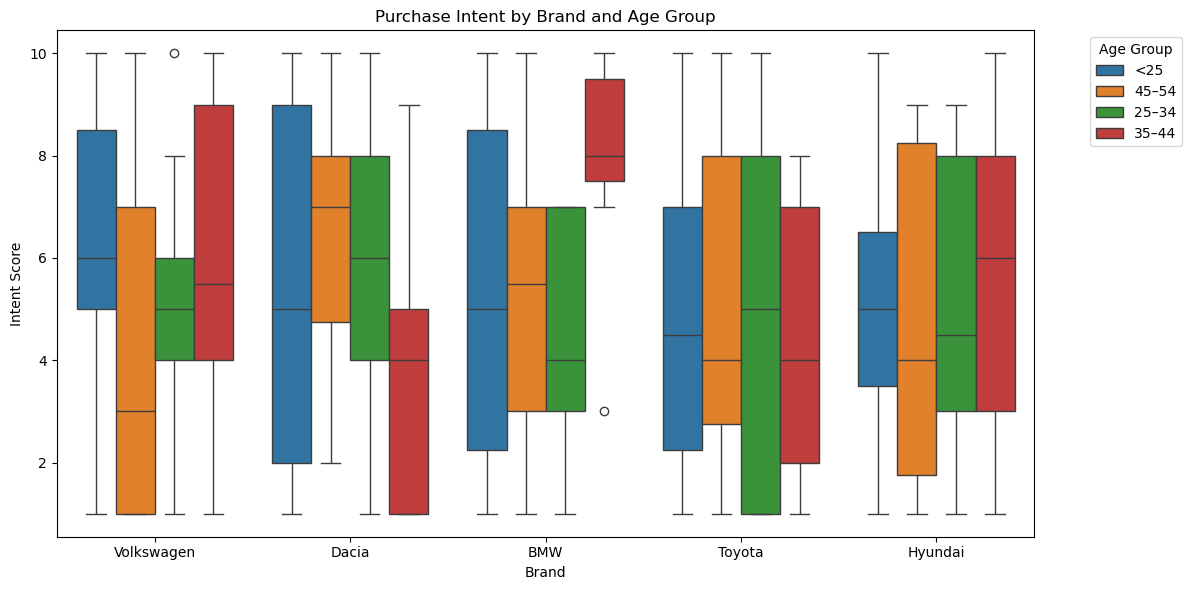

In [323]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='brand_choice_name', y='purchase_intent_score', hue='age_label')
plt.title('Purchase Intent by Brand and Age Group')
plt.xlabel('Brand')
plt.ylabel('Intent Score')
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Dropping columns that we dont need.

In [324]:
df = df.drop(['brand_choice_name','income_label', 'age_label', 'region_label'], axis=1)

## Reshape to Brand-Level Rows

### Our data has multiple columns per brand and one column for brand choice and purchase intent.

### Problem : A respondent’s purchase intent for that specific brand. But right now, each respondent's purchase intent score relates only to one brand, yet all brand features are in one row.

Step 1: We define the brands.

Step 2: Looping through the respondents and we create brand-specific rows.

Step 3: Creating a new row for each respondent with brand in list long_data

Started with this article:
https://medium.com/@rgr5882/100-days-of-data-science-day-35-reshaping-data-pivoting-and-melting-db7a0570bb74

Used chatGPT for information how exactly to approach my problem and which are the best functions to use in this scenario.

In [325]:
brands = ['toyota', 'bmw', 'vw', 'hyundai', 'dacia']
long_data = []

# itterrows over each row in a pandas Dataframe
for idx, row in df.iterrows():
    # enumerate adds a counter to any iterable, so you get both: 'i' is the index, 'item' is the value of the index
    for i, brand in enumerate(brands):
        long_data.append({
            'respondent_id': idx,
            'brand': brand,
            # Each brand’s perception and interest score using the brand name
            'perception': row[f'{brand}_perception'],
            'interest': row[f'{brand}_interest'],
            # Converts original brand labels (1 = Toyota, 2 = BMW, etc.) into binary columns: (1 if this brand was marked as value or luxury. // 0 otherwise)
            'value_brand': int(row['value_brand'] == i + 1),
            'luxury_brand': int(row['luxury_brand'] == i + 1),
            # Shared features
            'importance_price': row['importance_price'],
            'importance_fuel': row['importance_fuel'],
            'importance_brand': row['importance_brand'],
            'importance_tech': row['importance_tech'],
            'importance_safety': row['importance_safety'],
            'region': row['region'],
            'age': row['age'],
            'income': row['income'],
            'employment': row['employment'],
            # We have value 1 if the brand in this row is the one the respondent chose.
            'is_chosen': int(row['brand_choice'] == i + 1),
            # We set the purchase intent score only for the brand the respondent chose and we leave the other brands with None. This will help us with our variable y in our model to be more clean.
            'purchase_intent_score': row['purchase_intent_score'] if row['brand_choice'] == i + 1 else None
        })

# Convert all the info we filtered in a dataframe
df_long = pd.DataFrame(long_data)

# This way we will keep the rows wherr is chosen == 1
df_model = df_long[df_long['purchase_intent_score'].notna()].copy()

# We convert purchase intent into binary low and high  
df_model['intent_binary'] = df_model['purchase_intent_score'].apply(lambda x: 'low' if x <= 5 else 'high')

### To check the model performance we will simulate how it will perfrom on new data and will use Train/Test split in Random Forest Model

- We use **(test_size=0.2)** for training set of 80 % of the data and testing set of 20 %
- **(random_state=42)** is a way to control randomness in our code (Fun fact "The number 42 is often used in programming and science, partly as a tribute to "The Hitchhiker's Guide to the Galaxy" by Douglas Adams, where 42 is the "Answer to the Ultimate Question of Life, the Universe, and Everything") 

In [ ]:
X = df_model.drop(columns=['respondent_id', 'brand', 'is_chosen', 'purchase_intent_score', 'intent_binary'])
y = df_model['intent_binary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(random_state=42, class_weight='balanced')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [327]:
report = classification_report(y_test, y_pred, output_dict=True)
pd.DataFrame(report).transpose()

,precision,recall,f1-score,support
high,0.470588,0.250000,0.326531,32.00
low,0.441860,0.678571,0.535211,28.00
accuracy,0.450000,0.450000,0.450000,0.45
macro avg,0.456224,0.464286,0.430871,60.00
weighted avg,0.457182,0.450000,0.423915,60.00


## Model Performance Summary

- **Precision**
  - High: 47%
  - Low: 44%
  - → About 45% of positive predictions are correct for each class

- **Recall**
  - High: 25%
  - Low: 68%
  - → High recall for low class, weak recall for high

- **F1-score**
  - High: 33%
  - Low: 54%
  - → Better balance on low intend

- **Accuracy**: 45%

## Confusion Matrix

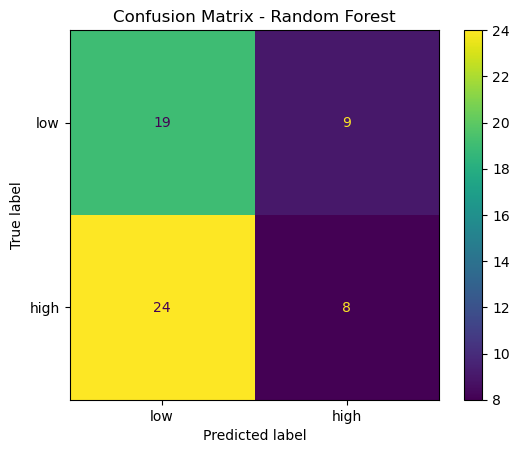

In [328]:
cm = confusion_matrix(y_test, y_pred, labels=['low', 'high'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['low', 'high'])
disp.plot()
plt.title('Confusion Matrix - Random Forest')
plt.show()

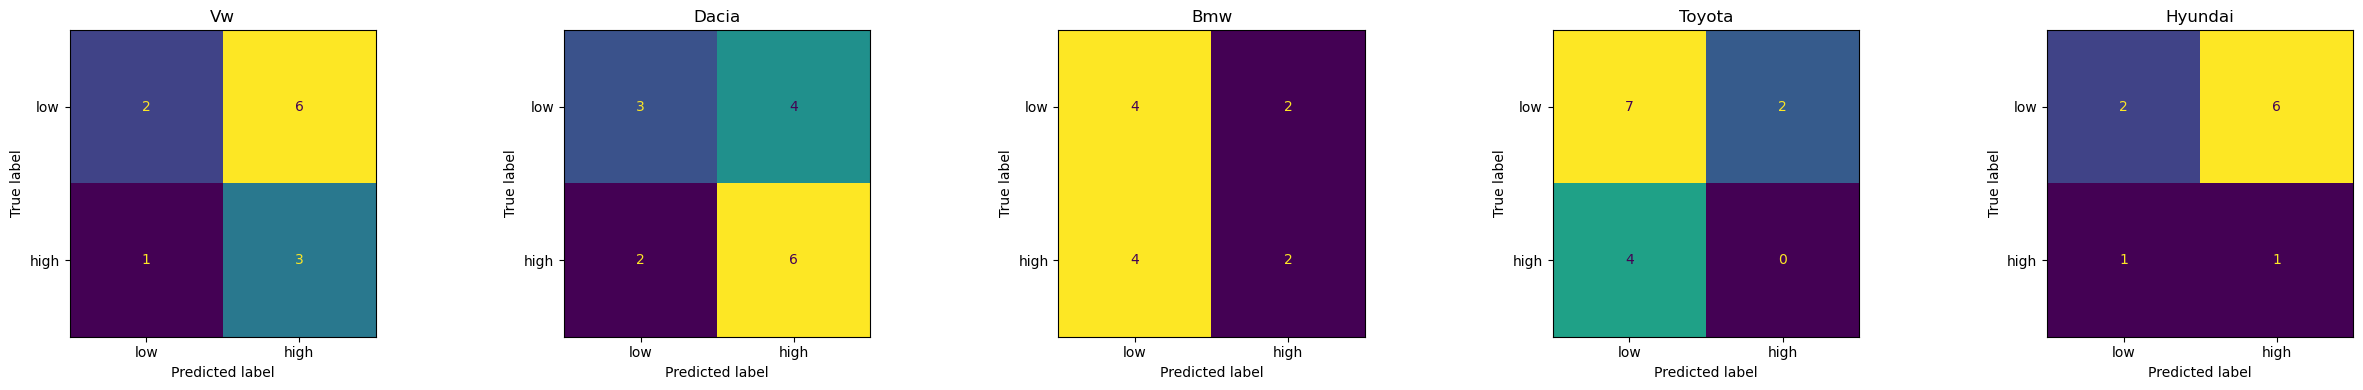

In [329]:
brands = df_model['brand'].unique()

# Set up subplots
fig, axs = plt.subplots(1, len(brands), figsize=(5 * len(brands), 4))

for i, brand in enumerate(brands):
    # Subset data by brand
    df_b = df_model[df_model['brand'] == brand]
    X = df_b.drop(columns=['respondent_id', 'brand', 'is_chosen', 'purchase_intent_score', 'intent_binary'])
    y = df_b['intent_binary']

    # Train/test split and model
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    clf = RandomForestClassifier(random_state=42, class_weight='balanced')
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels=['low', 'high'])
    ConfusionMatrixDisplay(cm, display_labels=['low', 'high']).plot(ax=axs[i], colorbar=False)
    axs[i].set_title(brand.capitalize())

plt.tight_layout()
plt.show()